Ahyeon Hwang
Day 6

In [1]:
dt = 0.001
ntmax = 1e6
NSample = 2000
D = 10
L = 10
NPCSize = 0.1
NPCLocation = [-L/2,0]
alpha = sqrt(2*D*dt)

0.1414213562373095

In [2]:
using Distributions

@time begin

tCapture = []
for i in 1:NSample
    x = [L/2,0]
    t = 0
    for nt in 1:ntmax
        x = x + alpha * randn(2,1)
        
        if x[1] > L/2
            x[1] = L/2
        elseif x[1] < -L/2
            x[1] = -L/2
        end
        
        if x[2] > L/2
            x[2] = L/2
        elseif x[2] < -L/2
            x[2] = -L/2
        end
        
        if ((x[1] - NPCLocation[1])^2 + (x[2] - NPCLocation[2]^2) < NPCSize^2)
            push!(tCapture,t); break
        end
        t = t + dt
    end
end

end

 26.470108 seconds (267.14 M allocations: 6.576 GiB, 5.46% gc time)


In [5]:
import Pkg
Pkg.add("Plots")

   Updating registry at `~/.julia/registries/General`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


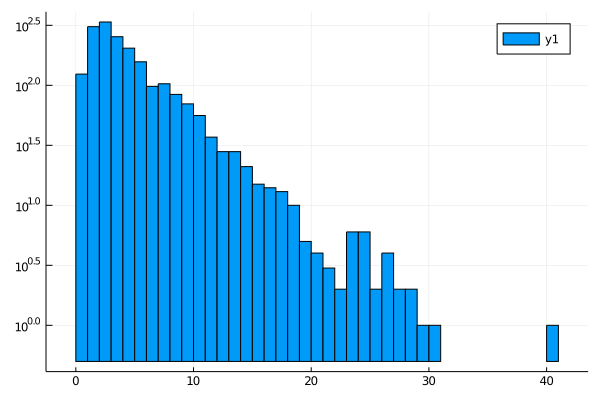

In [8]:
using Plots
histogram(tCapture, yaxis=(:log10))